# Image Segmentation

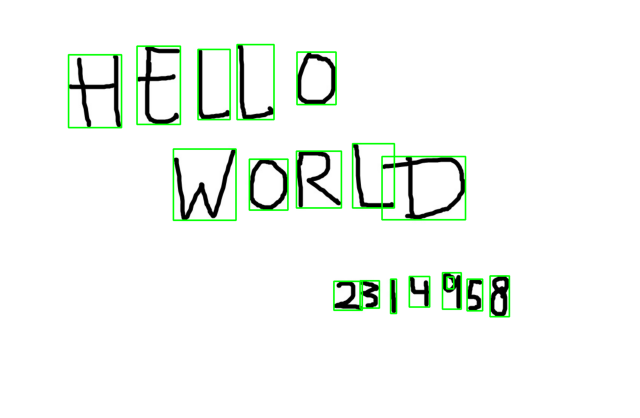

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 
from tensorflow.keras.models import load_model

image = cv2.imread("../data/test_image_1.jpg")
image_with_boxes = image.copy()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 30, 150)
contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

chars = []
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)
     # Extract the character and preprocess it
    roi = gray[y:y+h, x:x+w]
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    roi = roi.astype('float32') / 255.0
    roi = roi.reshape((1, 28, 28, 1))
    chars.append((roi, (x, y, w, h)))
    
plt.figure(figsize=(8, 6))
plt.imshow(image_with_boxes, cmap='gray')
plt.axis('off')
plt.show()


# Prediction Using model trained with emnist

In [3]:
# Initialize an empty dictionary
label_dictionary = {}

# Open the file and read its contents
file_path = "../data/emnist/emnist-balanced-mapping.txt"
with open(file_path, 'r') as file:
    # Read lines from the file
    lines = file.readlines()
    
    # Iterate over each line
    for line in lines:
        # Split each line based on space
        parts = line.split()
        
        # Ensure the line is in the expected format
        if len(parts) == 2:
            index = int(parts[0])  # Convert the index to integer
            ascii_value = int(parts[1])  # Convert the ASCII value to integer
            
            # Convert ASCII value to character
            character = chr(ascii_value)
            
            # Add to dictionary
            label_dictionary[index] = character

# Print the populated dictionary
print(label_dictionary)


{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'd', 39: 'e', 40: 'f', 41: 'g', 42: 'h', 43: 'n', 44: 'q', 45: 'r', 46: 't'}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


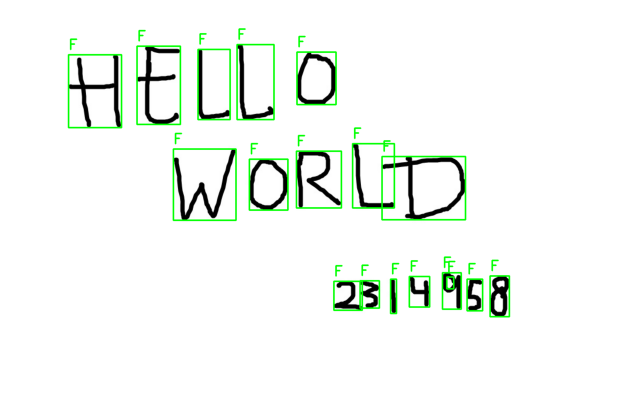

In [5]:
model = load_model('models/emnist_cnn_model.h5')
image_with_predictions = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

for roi, (x, y, w, h) in chars:
    cv2.rectangle(image_with_predictions, (x, y), (x + w, y + h), (0, 255, 0), 2)
    prediction = model.predict(roi)
    label = np.argmax(prediction, axis=1)[0]
    
    cv2.putText(image_with_predictions, label_dictionary[label], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(image_with_predictions, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Prediction Using model trained with curated

In [21]:
def load_class_names(data_dir):
    # Get sorted directory names, assuming they are named as ASCII values of the characters
    class_dirs = sorted([d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))])
    # Convert directory names from ASCII values to characters
    class_names = [chr(int(d)) for d in class_dirs]
    return class_names

data_dir = '../data/handwritting_characters_database/curated'
class_names = load_class_names(data_dir)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


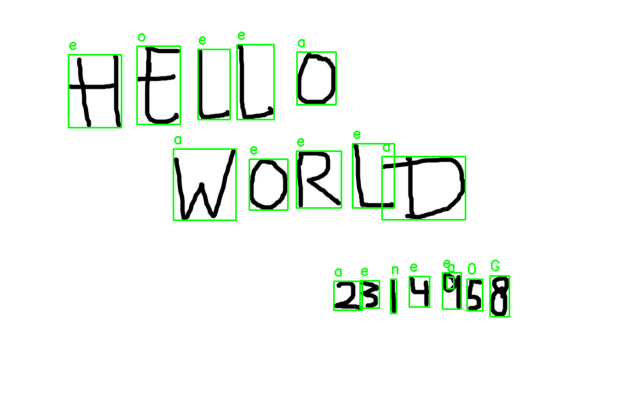

In [23]:
model = load_model('models/curated_cnn_model.h5')

image_with_predictions = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

for roi, (x, y, w, h) in chars:
    cv2.rectangle(image_with_predictions, (x, y), (x + w, y + h), (0, 255, 0), 2)
    prediction = model.predict(roi)
    label_index = np.argmax(prediction, axis=1)[0]
    label = class_names[label_index]
    
    cv2.putText(image_with_predictions, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(image_with_predictions, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()